In [1]:
import pandas as pd
from requests import get


def get_data(url):
    response = get(url, timeout=15)
    
    if response.status_code >= 400:
        raise RuntimeError(f'Request failed: { response.text }')
        
    return response.json()
    

if __name__ == '__main__':
    endpoint = (
        'https://api.coronavirus.data.gov.uk/v1/data?'
        'filters=areaType=nation;areaName=wales&'
        'structure={"areaname":"areaName","areacode":"areaCode","date":"date","newCases":"newCasesByPublishDate"}'
    )
    endpoint2 = (
        'https://api.coronavirus.data.gov.uk/v1/data?'
        'filters=areaType=nation;areaName=england&'
        'structure={"areaname":"areaName","areacode":"areaCode","date":"date","newCases":"newCasesByPublishDate"}'
    )
    endpoint3 = (
        'https://api.coronavirus.data.gov.uk/v1/data?'
        'filters=areaType=nation;areaName=northern ireland&'
        'structure={"areaname":"areaName","areacode":"areaCode","date":"date","newCases":"newCasesByPublishDate"}'
    )
    endpoint4 = (
        'https://api.coronavirus.data.gov.uk/v1/data?'
        'filters=areaType=nation;areaName=scotland&'
        'structure={"areaname":"areaName","areacode":"areaCode","date":"date","newCases":"newCasesByPublishDate"}'
    )


    data = get_data(endpoint2)
    wales_data = get_data(endpoint)
    N_ireland = get_data(endpoint3)
    scot = get_data(endpoint4)
    #print(data)
    print(wales_data)


{'length': 310, 'maxPageLimit': 2500, 'data': [{'areaname': 'Wales', 'areacode': 'W92000004', 'date': '2020-11-06', 'newCases': 1352}, {'areaname': 'Wales', 'areacode': 'W92000004', 'date': '2020-11-05', 'newCases': 1272}, {'areaname': 'Wales', 'areacode': 'W92000004', 'date': '2020-11-04', 'newCases': 1202}, {'areaname': 'Wales', 'areacode': 'W92000004', 'date': '2020-11-03', 'newCases': 1119}, {'areaname': 'Wales', 'areacode': 'W92000004', 'date': '2020-11-02', 'newCases': 1646}, {'areaname': 'Wales', 'areacode': 'W92000004', 'date': '2020-11-01', 'newCases': 819}, {'areaname': 'Wales', 'areacode': 'W92000004', 'date': '2020-10-31', 'newCases': 1301}, {'areaname': 'Wales', 'areacode': 'W92000004', 'date': '2020-10-30', 'newCases': 1737}, {'areaname': 'Wales', 'areacode': 'W92000004', 'date': '2020-10-29', 'newCases': 1375}, {'areaname': 'Wales', 'areacode': 'W92000004', 'date': '2020-10-28', 'newCases': 1414}, {'areaname': 'Wales', 'areacode': 'W92000004', 'date': '2020-10-27', 'newC

In [2]:
type(data['data'])

list

In [3]:
Eng_df=pd.DataFrame(data['data'])
wales_df=pd.DataFrame(wales_data['data'])
nireland_df=pd.DataFrame(N_ireland['data'])
scot_df = pd.DataFrame(scot['data'])

In [4]:
scot_df.sort_values(by=['date'])


,areaname,areacode,date,newCases
309,Scotland,S92000003,2020-01-02,0
308,Scotland,S92000003,2020-01-03,0
307,Scotland,S92000003,2020-01-04,0
306,Scotland,S92000003,2020-01-05,0
305,Scotland,S92000003,2020-01-06,0
...,...,...,...,...
4,Scotland,S92000003,2020-11-02,951
3,Scotland,S92000003,2020-11-03,999
2,Scotland,S92000003,2020-11-04,1433
1,Scotland,S92000003,2020-11-05,1216


In [5]:
UK_df = pd.concat([scot_df, wales_df, nireland_df,Eng_df], ignore_index = True, sort=False)

In [6]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [7]:
from uk_covid19 import Cov19API,api_interface,data_format

In [8]:

cases_and_deaths = {
    "date":"date",
    "newCases":"newCasesByPublishDate",
    "newCumCases":"cumCasesByPublishDate",

    
}
all_nations = [
    "areaType=overview"
]

api = Cov19API(
    filters=all_nations,
    structure=cases_and_deaths,
    #latest_by="newCasesByPublishDate"
)

data = api.get_json()

print(data)

{'data': [{'date': '2020-11-06', 'newCases': 23287, 'newCumCases': 1146484}, {'date': '2020-11-05', 'newCases': 24141, 'newCumCases': 1123197}, {'date': '2020-11-04', 'newCases': 25177, 'newCumCases': 1099059}, {'date': '2020-11-03', 'newCases': 20018, 'newCumCases': 1073882}, {'date': '2020-11-02', 'newCases': 18950, 'newCumCases': 1053864}, {'date': '2020-11-01', 'newCases': 23254, 'newCumCases': 1034914}, {'date': '2020-10-31', 'newCases': 21915, 'newCumCases': 1011660}, {'date': '2020-10-30', 'newCases': 24405, 'newCumCases': 989745}, {'date': '2020-10-29', 'newCases': 23065, 'newCumCases': 965340}, {'date': '2020-10-28', 'newCases': 24701, 'newCumCases': 942275}, {'date': '2020-10-27', 'newCases': 22885, 'newCumCases': 917575}, {'date': '2020-10-26', 'newCases': 20890, 'newCumCases': 894690}, {'date': '2020-10-25', 'newCases': 19790, 'newCumCases': 873800}, {'date': '2020-10-24', 'newCases': 23012, 'newCumCases': 854010}, {'date': '2020-10-23', 'newCases': 20530, 'newCumCases': 83

In [9]:
Uk_data = pd.DataFrame(data['data'])

In [10]:
Uk_data.tail()

,date,newCases,newCumCases
305,2020-01-06,0,NaN
306,2020-01-05,0,NaN
307,2020-01-04,0,NaN
308,2020-01-03,0,NaN
309,2020-01-02,0,NaN


In [11]:
Uk_data['newCumCases'] = Uk_data['newCumCases'].fillna(0.0).astype('int')

In [12]:
Uk_data = Uk_data.loc[Uk_data['date']>='2020-02-01'].sort_values(by='date',ascending=True)


In [13]:
Uk_data.loc[Uk_data['date']=='2020-02-01']
dates = ['01 Feb','01 Mar','01 Apr','01 May','01 Jun','01 Jul','01 Aug','01 Sep','01 Oct','01 Nov']

In [15]:
import numpy as np
x = np.array_split(Uk_data['newCases'].to_list(),56)
mylist=[]
for i in range(0,len(x)):
    mylist.append(np.average(x[i]))

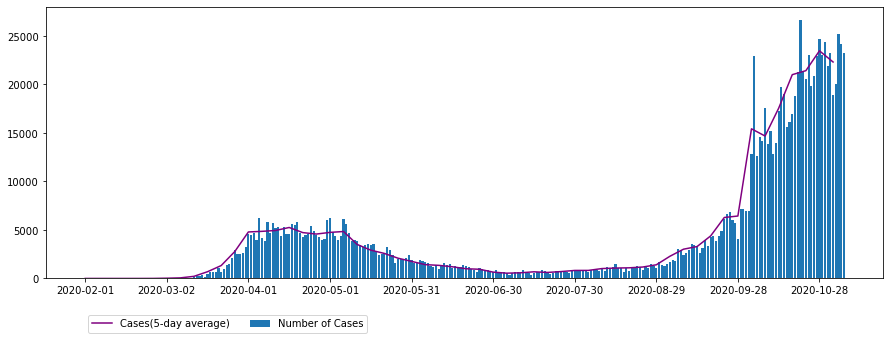

In [16]:
plt.figure(figsize=(15,5))

plt.bar(x=Uk_data['date'], height=Uk_data['newCases'],label='Number of Cases')
plt.xticks(ticks= Uk_data['date'][::30])
plt.plot(Uk_data['date'][::5],mylist,color = 'purple',label='Cases(5-day average)')
plt.legend(ncol=2,bbox_to_anchor=(0.05, -0.2),loc='lower left',borderaxespad=0.)
plt.show()

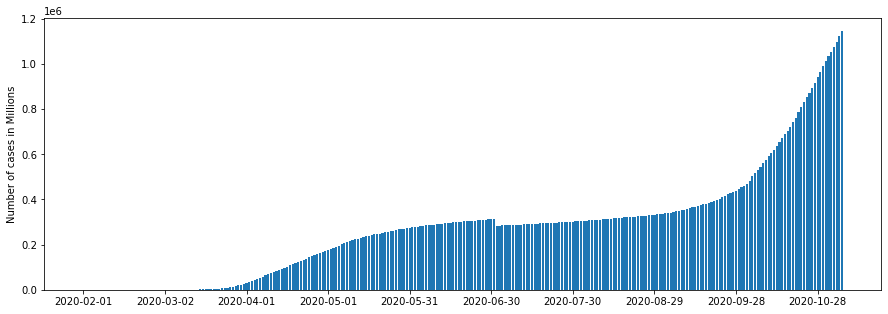

In [18]:
plt.figure(figsize=(15,5))
plt.bar(x=Uk_data['date'], height=Uk_data['newCumCases'],label='Number of Cases')
plt.xticks(ticks= Uk_data['date'][::30])
plt.ylabel('Number of cases in Millions')

plt.show()